In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.utils import resample
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC 
from sklearn.tree import plot_tree
from tqdm.notebook import tqdm
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    precision_recall_curve, roc_curve, roc_auc_score)
from numba import njit
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

In [4]:
data = pd.read_csv("/Users/ismaelcisse/Downloads/data.csv")

In [5]:
data.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [6]:
data.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


In [7]:
data.dtypes

Bankrupt?                                                     int64
 ROA(C) before interest and depreciation before interest    float64
 ROA(A) before interest and % after tax                     float64
 ROA(B) before interest and depreciation after tax          float64
 Operating Gross Margin                                     float64
                                                             ...   
 Liability to Equity                                        float64
 Degree of Financial Leverage (DFL)                         float64
 Interest Coverage Ratio (Interest expense to EBIT)         float64
 Net Income Flag                                              int64
 Equity to Liability                                        float64
Length: 96, dtype: object

In [8]:
data.isnull().sum()

Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
                                                           ..
 Liability to Equity                                        0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Net Income Flag                                            0
 Equity to Liability                                        0
Length: 96, dtype: int64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [10]:
X = data.drop(columns=['Bankrupt?'])
y = data['Bankrupt?'] #Our target / outcome

In [8]:
#def generate_model_report(Y_actual, Y_predicted):
#    print("Accuracy = ", accuracy_score(Y_actual, Y_predicted))
#    print("Precision = ", precision_score(Y_actual, Y_predicted))
#    print("Recall = ", recall_score(Y_actual, Y_predicted))
#    print("F1 = ", f1_score(Y_actual, Y_predicted))
#    pass

In [142]:
#def auc_roc_curve(clf, X_test):
#    Y_pred = clf.predict_proba(X_test)[:, 1]
#    fpr,tpr,thresholds = roc_curve(Y_test, Y_pred)
#    auc = roc_auc_score(Y_test, Y_pred)
#    plt.plot(fpr,tpr,label="Auc Roc Curve")
#    plt.legend(loc=4)
#    plt.show
#    pass

# Scaling Part

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [12]:
scaler = MinMaxScaler().fit(X_train)
X_train_scaled = pd.DataFrame(scaler.transform(X_train),columns=X.columns)

In [13]:
X_test_scaled = pd.DataFrame(scaler.transform(X_test),columns=X.columns)
X_train_scaled.head()

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,0.498513,0.542848,0.544622,0.599194,0.599036,0.998986,0.797412,0.809330,0.303528,0.781593,...,0.815271,5.927989e-13,0.623649,0.599196,0.840580,0.172028,0.027239,0.768886,0.0,0.022512
1,0.506606,0.562309,0.558863,0.609334,0.609334,0.999027,0.797450,0.809375,0.303508,0.781637,...,0.825039,4.895741e-14,0.623932,0.609332,0.841339,0.169726,0.026843,0.767174,0.0,0.026670
2,0.508799,0.561001,0.554687,0.614242,0.614055,0.999094,0.797533,0.809424,0.303514,0.781692,...,0.823845,1.423022e-13,0.623714,0.614241,0.840969,0.166496,0.026864,0.767294,0.0,0.041556
3,0.499976,0.562527,0.546764,0.597825,0.597825,0.999004,0.797411,0.809329,0.303490,0.781590,...,0.824193,1.016438e-13,0.623986,0.597824,0.841885,0.176998,0.026951,0.767750,0.0,0.018173
4,0.477892,0.547700,0.529150,0.600362,0.600362,0.998975,0.797412,0.809333,0.303551,0.781584,...,0.818654,2.877733e-13,0.623845,0.600363,0.840885,0.171460,0.026959,0.767788,0.0,0.023328


In [14]:
y_train = y_train.reset_index(drop=True) 
y_test = y_test.reset_index(drop=True)

# Models (Logistic Regression - KNeighbors - SVC - Random Forest Classifier

In [15]:
lr_clf = LogisticRegression(random_state=0, solver='saga',max_iter=1000)
lr_clf.fit(X_train_scaled, y_train)
#clf1.fit(X_train_scaled, y_train)

kn_clf = KNeighborsClassifier()
kn_clf.fit(X_train_scaled, y_train)

svm_clf = SVC(kernel='linear',probability=True)
svm_clf.fit(X_train_scaled, y_train)

rf_clf = RandomForestClassifier(n_estimators=100, n_jobs=-1)
rf_clf.fit(X_train_scaled, y_train)

RandomForestClassifier(n_jobs=-1)

In [18]:
print("Logistic Regression")
print("lr_clf score after scaling ",lr_clf.score(X_test_scaled, y_test))
print("lr_clf score before scaling ",lr_clf.score(X_test, y_test))
print("\n---------------------------------------------------------------")

print("KNeighbors")
print("kn_clf score after scaling ",kn_clf.score(X_test_scaled, y_test))
print("kn_clf score before scaling ",kn_clf.score(X_test, y_test))
print("\n---------------------------------------------------------------")

print("SVM")
print("svm_clf score after scaling ",svm_clf.score(X_test_scaled, y_test))
print("svm_clf score before scaling ",svm_clf.score(X_test, y_test))
print("\n---------------------------------------------------------------")

print("Random Forest Classifier")
print("rf_clf score after scaling ",rf_clf.score(X_test_scaled, y_test))
print("rf_clf score before scaling ",rf_clf.score(X_test, y_test))
print("\n---------------------------------------------------------------")

#roc_auc_score

#LogisticRegressor
#Y_scores_lr_clf = lr_clf.predict_proba(X_test_scaled)
#Y_score_lr_clf = Y_scores_lr_clf[:, 1]
#lr_clf_roc = roc_auc_score(y_test, Y_score_lr_clf)
#print(lr_clf_roc)

#KNeighborsClassifier
#Y_scores_kn_clf = kn_clf.predict_proba(X_test_scaled)
#Y_score_kn_clf = Y_scores_kn_clf[:, 1]
#kn_clf_roc = roc_auc_score(y_test, Y_score_kn_clf)
#print(kn_clf_roc)

#SVM
#Y_scores_svm_clf = svm_clf.predict_proba(X_test_scaled)
#Y_score_svm_clf = Y_scores_svm_clf[:, 1]
#svm_clf_roc = roc_auc_score(y_test, Y_score_svm_clf)
#print(svm_clf_roc)


#RandomForestClassifier
#Y_scores_rf_clf = rf_clf.predict_proba(X_test_scaled)
#Y_score_rf_clf = Y_scores_rf_clf[:, 1]
#rf_clf_roc = roc_auc_score(y_test, Y_score_rf_clf)
#print(rf_clf_roc)

Logistic Regression
lr_clf score after scaling  0.966275659824047
lr_clf score before scaling  0.8269794721407625

---------------------------------------------------------------
KNeighbors
kn_clf score after scaling  0.9626099706744868
kn_clf score before scaling  0.9626099706744868

---------------------------------------------------------------
SVM
svm_clf score after scaling  0.9633431085043989
svm_clf score before scaling  0.6796187683284457

---------------------------------------------------------------
Random Forest Classifier
rf_clf score after scaling  0.967008797653959
rf_clf score before scaling  0.9655425219941349

---------------------------------------------------------------


In [19]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score #(Precision and Recall)

pred = rf_clf.predict(X_test_scaled)

print("precision: ",precision_score(y_test,pred))
print("recall: ",recall_score(y_test,pred))
print("f1: ",f1_score(y_test,pred))

precision:  0.8
recall:  0.1568627450980392
f1:  0.2622950819672131


# Voting Classifier 

In [20]:
#Voting Classifier - Hard Voting
from sklearn.ensemble import VotingClassifier
#
#
voting_clf_hard = VotingClassifier([("lr_clf", lr_clf),("kn_clf", kn_clf),
    ("svm_clf",svm_clf),("rf_clf",rf_clf)
],voting="hard")

In [20]:
voting_clf_hard.fit(X_train_scaled, y_train)

VotingClassifier(estimators=[('lr_clf',
                              LogisticRegression(max_iter=1000, random_state=0,
                                                 solver='saga')),
                             ('kn_clf', KNeighborsClassifier()),
                             ('svm_clf',
                              SVC(kernel='linear', probability=True)),
                             ('rf_clf', RandomForestClassifier(n_jobs=-1))])

In [21]:
voting_clf_hard.fit(X_test_scaled, y_test)

/Users/ismaelcisse/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


VotingClassifier(estimators=[('lr_clf',
                              LogisticRegression(max_iter=1000, random_state=0,
                                                 solver='saga')),
                             ('kn_clf', KNeighborsClassifier()),
                             ('svm_clf',
                              SVC(kernel='linear', probability=True)),
                             ('rf_clf', RandomForestClassifier(n_jobs=-1))])

In [22]:
voting_clf_hard.score(X_test_scaled, y_test)

0.969208211143695

In [23]:
y_pred = voting_clf_hard.predict(X_test)

In [29]:
score = accuracy_score(y_test, y_pred)
print("Hard Voting Score % d" % score)

Hard Voting Score  0


In [30]:
#Voting Classifier - Soft Voting

voting_clf_soft = VotingClassifier([("lr_clf", lr_clf),("kn_clf", kn_clf),
    ("svm_clf",svm_clf),("rf_clf",rf_clf)
],voting="soft")

In [31]:
voting_clf_soft.fit(X_train_scaled, y_train)

VotingClassifier(estimators=[('lr_clf',
                              LogisticRegression(max_iter=1000, random_state=0,
                                                 solver='saga')),
                             ('kn_clf', KNeighborsClassifier()),
                             ('svm_clf',
                              SVC(kernel='linear', probability=True)),
                             ('rf_clf', RandomForestClassifier(n_jobs=-1))],
                 voting='soft')

In [27]:
voting_clf_soft.fit(X_test_scaled, y_test)

/Users/ismaelcisse/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


VotingClassifier(estimators=[('lr_clf',
                              LogisticRegression(max_iter=1000, random_state=0,
                                                 solver='saga')),
                             ('kn_clf', KNeighborsClassifier()),
                             ('svm_clf',
                              SVC(kernel='linear', probability=True)),
                             ('rf_clf', RandomForestClassifier(n_jobs=-1))],
                 voting='soft')

In [32]:
voting_clf_soft.score(X_test_scaled, y_test)

0.9640762463343109

In [33]:
y_pred = voting_clf_soft.predict(X_test)

In [34]:
score = accuracy_score(y_test, y_pred)
print("Soft Voting Score % d" % score)

Soft Voting Score  0


# Scores - Imbalanced Data handling 

0    6599
1     220
Name: Bankrupt?, dtype: int64


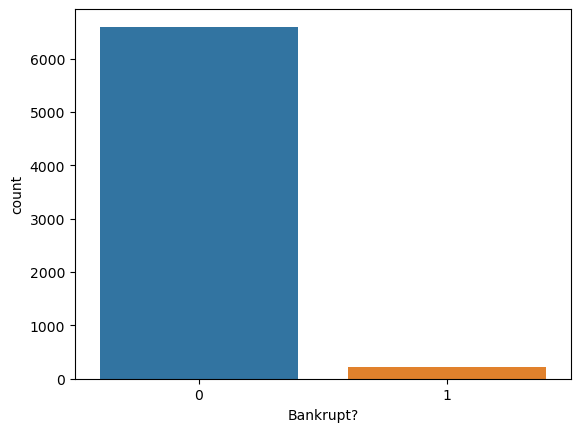

In [35]:
ax = sns.countplot(x='Bankrupt?', data = data)
print(data['Bankrupt?'].value_counts())

In [36]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score #(Precision and Recall)

pred = lr_clf.predict(X_test_scaled)

print("precision: ",precision_score(y_test,pred))
print("recall: ",recall_score(y_test,pred))
print("f1: ",f1_score(y_test,pred))

precision:  0.8571428571428571
recall:  0.11764705882352941
f1:  0.2068965517241379


In [37]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred)

array([[1312,    1],
       [  45,    6]])

In [41]:
print("roc_auc_score")

print("LogisticRegressor")
Y_scores_lr_clf = lr_clf.predict_proba(X_test_scaled)
Y_score_lr_clf = Y_scores_lr_clf[:, 1]
lr_clf_roc = roc_auc_score(y_test, Y_score_lr_clf)
print(lr_clf_roc)
print("\n---------------------------------------------------------------")


print("SVM")
Y_scores_svm_clf = svm_clf.predict_proba(X_test_scaled)
Y_score_svm_clf = Y_scores_svm_clf[:, 1]
svm_clf_roc = roc_auc_score(y_test, Y_score_svm_clf)
print(svm_clf_roc)
print("\n---------------------------------------------------------------")

print("RandomForestClassifier")
Y_scores_rf_clf = rf_clf.predict_proba(X_test_scaled)
Y_score_rf_clf = Y_scores_rf_clf[:, 1]
rf_clf_roc = roc_auc_score(y_test, Y_score_rf_clf)
print(rf_clf_roc)
print("\n---------------------------------------------------------------")

print("KNeighbors")
Y_scores_kn_clf = kn_clf.predict_proba(X_test_scaled)
Y_score_kn_clf = Y_scores_kn_clf[:, 1]
kn_clf_roc = roc_auc_score(y_test, Y_score_kn_clf)
print(kn_clf_roc)
print("\n---------------------------------------------------------------")

roc_auc_score
LogisticRegressor
0.9382644146767618

---------------------------------------------------------------
SVM
0.8622672221973328

---------------------------------------------------------------
RandomForestClassifier
0.9011991696907247

---------------------------------------------------------------
KNeighbors
0.7729417738153905

---------------------------------------------------------------


In [42]:
train = pd.concat([X_train_scaled, y_train],axis=1)
train.head()

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability,Bankrupt?
0,0.498513,0.542848,0.544622,0.599194,0.599036,0.998986,0.797412,0.809330,0.303528,0.781593,...,5.927989e-13,0.623649,0.599196,0.840580,0.172028,0.027239,0.768886,0.0,0.022512,0
1,0.506606,0.562309,0.558863,0.609334,0.609334,0.999027,0.797450,0.809375,0.303508,0.781637,...,4.895741e-14,0.623932,0.609332,0.841339,0.169726,0.026843,0.767174,0.0,0.026670,0
2,0.508799,0.561001,0.554687,0.614242,0.614055,0.999094,0.797533,0.809424,0.303514,0.781692,...,1.423022e-13,0.623714,0.614241,0.840969,0.166496,0.026864,0.767294,0.0,0.041556,0
3,0.499976,0.562527,0.546764,0.597825,0.597825,0.999004,0.797411,0.809329,0.303490,0.781590,...,1.016438e-13,0.623986,0.597824,0.841885,0.176998,0.026951,0.767750,0.0,0.018173,0
4,0.477892,0.547700,0.529150,0.600362,0.600362,0.998975,0.797412,0.809333,0.303551,0.781584,...,2.877733e-13,0.623845,0.600363,0.840885,0.171460,0.026959,0.767788,0.0,0.023328,0


In [44]:
no_bankrupt = train[train['Bankrupt?']==0]
bankrupt = train[train['Bankrupt?']==1]

In [45]:
display(no_bankrupt.shape)
display(bankrupt.shape)

(5286, 96)

(169, 96)

In [46]:
bankrupt_oversampled = resample(bankrupt, #<- sample from here
                                    replace=True, #<- we need replacement, since we don't have enough data otherwise
                                    n_samples = len(no_bankrupt),#<- make both sets the same size
                                    random_state=0)

In [47]:
bankrupt.groupby(bankrupt.columns.tolist(),as_index=False).size()

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability,Bankrupt?,size
0,0.024277,0.000000,0.033514,0.591324,0.591324,0.994015,0.791503,0.803775,0.303602,0.775602,...,0.623818,0.591322,0.827165,0.165428,0.026791,0.766852,0.0,0.054959,1,1
1,0.066933,0.057185,0.054821,0.601861,0.601861,0.998825,0.796779,0.808717,0.302760,0.780927,...,0.623648,0.601857,1.000000,0.056881,0.026763,0.766666,0.0,0.009178,1,1
2,0.102325,0.121511,0.112212,0.585876,0.585876,0.998786,0.796917,0.808863,0.303082,0.781085,...,0.623637,0.585875,0.798728,0.177170,0.026771,0.766718,0.0,0.018077,1,1
3,0.196802,0.211023,0.221425,0.598056,0.598056,0.998933,0.796144,0.808149,0.301423,0.780388,...,0.623465,0.598051,0.856906,0.145156,0.026769,0.766708,0.0,0.003946,1,1
4,0.201969,0.200720,0.228652,0.590914,0.590914,0.998625,0.796846,0.808804,0.303294,0.781065,...,0.623737,0.590912,0.802162,0.177675,0.026782,0.766794,0.0,0.017808,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,0.506021,0.571140,0.564645,0.604996,0.604996,0.999055,0.797482,0.809410,0.303507,0.781676,...,0.624368,0.604992,0.841902,0.177740,0.027213,0.768802,0.0,0.017775,1,1
165,0.506362,0.565689,0.561914,0.600218,0.600218,0.999061,0.797442,0.809412,0.303423,0.781625,...,0.624313,0.600213,0.844107,0.184902,0.027237,0.768880,0.0,0.015316,1,1
166,0.519768,0.538051,0.558060,0.622595,0.622595,0.999066,0.797430,0.809328,0.303392,0.781587,...,0.623977,0.622592,0.840240,0.166794,0.027053,0.768211,0.0,0.039145,1,1
167,0.519817,0.484627,0.502918,0.626436,0.626436,0.999068,0.797464,0.809120,0.303446,0.781406,...,0.623687,0.626436,0.835992,0.174364,0.027249,0.768919,0.0,0.020003,1,1


In [48]:
bankrupt_oversampled.groupby(bankrupt_oversampled.columns.tolist(),as_index=False).size()

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability,Bankrupt?,size
0,0.024277,0.000000,0.033514,0.591324,0.591324,0.994015,0.791503,0.803775,0.303602,0.775602,...,0.623818,0.591322,0.827165,0.165428,0.026791,0.766852,0.0,0.054959,1,38
1,0.066933,0.057185,0.054821,0.601861,0.601861,0.998825,0.796779,0.808717,0.302760,0.780927,...,0.623648,0.601857,1.000000,0.056881,0.026763,0.766666,0.0,0.009178,1,27
2,0.102325,0.121511,0.112212,0.585876,0.585876,0.998786,0.796917,0.808863,0.303082,0.781085,...,0.623637,0.585875,0.798728,0.177170,0.026771,0.766718,0.0,0.018077,1,34
3,0.196802,0.211023,0.221425,0.598056,0.598056,0.998933,0.796144,0.808149,0.301423,0.780388,...,0.623465,0.598051,0.856906,0.145156,0.026769,0.766708,0.0,0.003946,1,37
4,0.201969,0.200720,0.228652,0.590914,0.590914,0.998625,0.796846,0.808804,0.303294,0.781065,...,0.623737,0.590912,0.802162,0.177675,0.026782,0.766794,0.0,0.017808,1,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,0.506021,0.571140,0.564645,0.604996,0.604996,0.999055,0.797482,0.809410,0.303507,0.781676,...,0.624368,0.604992,0.841902,0.177740,0.027213,0.768802,0.0,0.017775,1,25
165,0.506362,0.565689,0.561914,0.600218,0.600218,0.999061,0.797442,0.809412,0.303423,0.781625,...,0.624313,0.600213,0.844107,0.184902,0.027237,0.768880,0.0,0.015316,1,32
166,0.519768,0.538051,0.558060,0.622595,0.622595,0.999066,0.797430,0.809328,0.303392,0.781587,...,0.623977,0.622592,0.840240,0.166794,0.027053,0.768211,0.0,0.039145,1,34
167,0.519817,0.484627,0.502918,0.626436,0.626436,0.999068,0.797464,0.809120,0.303446,0.781406,...,0.623687,0.626436,0.835992,0.174364,0.027249,0.768919,0.0,0.020003,1,28


### Imbalanced Data Problem Solved

In [49]:
display(no_bankrupt.shape)
display(bankrupt_oversampled.shape)

(5286, 96)

(5286, 96)

In [50]:
train_oversampled = pd.concat([no_bankrupt,bankrupt_oversampled],axis=0)
train_oversampled.tail()
train_oversampled["Bankrupt?"].value_counts()

0    5286
1    5286
Name: Bankrupt?, dtype: int64

In [51]:
y_train_over = train_oversampled['Bankrupt?'].copy()
X_train_over = train_oversampled.drop('Bankrupt?',axis = 1).copy()

In [52]:
X_train_over.head()

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,0.498513,0.542848,0.544622,0.599194,0.599036,0.998986,0.797412,0.809330,0.303528,0.781593,...,0.815271,5.927989e-13,0.623649,0.599196,0.840580,0.172028,0.027239,0.768886,0.0,0.022512
1,0.506606,0.562309,0.558863,0.609334,0.609334,0.999027,0.797450,0.809375,0.303508,0.781637,...,0.825039,4.895741e-14,0.623932,0.609332,0.841339,0.169726,0.026843,0.767174,0.0,0.026670
2,0.508799,0.561001,0.554687,0.614242,0.614055,0.999094,0.797533,0.809424,0.303514,0.781692,...,0.823845,1.423022e-13,0.623714,0.614241,0.840969,0.166496,0.026864,0.767294,0.0,0.041556
3,0.499976,0.562527,0.546764,0.597825,0.597825,0.999004,0.797411,0.809329,0.303490,0.781590,...,0.824193,1.016438e-13,0.623986,0.597824,0.841885,0.176998,0.026951,0.767750,0.0,0.018173
4,0.477892,0.547700,0.529150,0.600362,0.600362,0.998975,0.797412,0.809333,0.303551,0.781584,...,0.818654,2.877733e-13,0.623845,0.600363,0.840885,0.171460,0.026959,0.767788,0.0,0.023328


In [53]:
lr_clf = LogisticRegression(random_state=0, solver='saga',max_iter=1000)
lr_clf.fit(X_train_over, y_train_over)
#clf1.fit(X_train_scaled, y_train)

kn_clf = KNeighborsClassifier()
kn_clf.fit(X_train_over, y_train_over)

svm_clf = SVC(kernel='linear',probability=True)
svm_clf.fit(X_train_over, y_train_over)

rf_clf = RandomForestClassifier(n_estimators=100, n_jobs=-1)
rf_clf.fit(X_train_over, y_train_over)

RandomForestClassifier(n_jobs=-1)

In [67]:
pred = lr_clf.predict(X_test_scaled)

print("lr accuracy: ",accuracy_score(y_test,pred))
print("lr precision: ",precision_score(y_test,pred))
print("lr recall: ",recall_score(y_test,pred))
print("lr f1: ",f1_score(y_test,pred))

lr accuracy:  0.8533724340175953
lr precision:  0.1829787234042553
lr recall:  0.8431372549019608
lr f1:  0.3006993006993007


In [66]:
pred = kn_clf.predict(X_test_scaled)

print("kn accuracy: ",accuracy_score(y_test,pred))
print("kn precision: ",precision_score(y_test,pred))
print("kn recall: ",recall_score(y_test,pred))
print("kn f1: ",f1_score(y_test,pred))

kn accuracy:  0.9296187683284457
kn precision:  0.25806451612903225
kn recall:  0.47058823529411764
kn f1:  0.3333333333333333


In [65]:
pred = svm_clf.predict(X_test_scaled)

print("svm accuracy: ",accuracy_score(y_test,pred))
print("svm precision: ",precision_score(y_test,pred))
print("svm recall: ",recall_score(y_test,pred))
print("svm f1: ",f1_score(y_test,pred))

svm accuracy:  0.8475073313782991
svm precision:  0.17427385892116182
svm recall:  0.8235294117647058
svm f1:  0.2876712328767123


In [68]:
pred = rf_clf.predict(X_test_scaled)

print("rf accuracy: ",accuracy_score(y_test,pred))
print("rf precision: ",precision_score(y_test,pred))
print("rf recall: ",recall_score(y_test,pred))
print("rf f1: ",f1_score(y_test,pred))

rf accuracy:  0.9633431085043989
rf precision:  0.52
rf recall:  0.2549019607843137
rf f1:  0.3421052631578947


In [69]:
#Voting Classifier - Hard Voting
from sklearn.ensemble import VotingClassifier
#
#
voting_clf_hard = VotingClassifier([("lr_clf", lr_clf),("kn_clf", kn_clf),
    ("svm_clf",svm_clf),("rf_clf",rf_clf)
],voting="hard")

In [70]:
voting_clf_hard.fit(X_train_over, y_train_over)

VotingClassifier(estimators=[('lr_clf',
                              LogisticRegression(max_iter=1000, random_state=0,
                                                 solver='saga')),
                             ('kn_clf', KNeighborsClassifier()),
                             ('svm_clf',
                              SVC(kernel='linear', probability=True)),
                             ('rf_clf', RandomForestClassifier(n_jobs=-1))])

In [71]:
voting_clf_hard.score(X_test_scaled, y_test)

0.9545454545454546

In [72]:
y_pred = voting_clf_hard.predict(X_test)

In [73]:
score = accuracy_score(y_test, y_pred)
print("Hard Voting Score % d" % score)

Hard Voting Score  0


In [74]:
#Voting Classifier - Soft Voting

voting_clf_soft = VotingClassifier([("lr_clf", lr_clf),("kn_clf", kn_clf),
    ("svm_clf",svm_clf),("rf_clf",rf_clf)
],voting="soft")

In [75]:
voting_clf_soft.fit(X_train_scaled, y_train)

VotingClassifier(estimators=[('lr_clf',
                              LogisticRegression(max_iter=1000, random_state=0,
                                                 solver='saga')),
                             ('kn_clf', KNeighborsClassifier()),
                             ('svm_clf',
                              SVC(kernel='linear', probability=True)),
                             ('rf_clf', RandomForestClassifier(n_jobs=-1))],
                 voting='soft')

In [76]:
voting_clf_soft.fit(X_test_scaled, y_test)

/Users/ismaelcisse/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


VotingClassifier(estimators=[('lr_clf',
                              LogisticRegression(max_iter=1000, random_state=0,
                                                 solver='saga')),
                             ('kn_clf', KNeighborsClassifier()),
                             ('svm_clf',
                              SVC(kernel='linear', probability=True)),
                             ('rf_clf', RandomForestClassifier(n_jobs=-1))],
                 voting='soft')

In [77]:
voting_clf_soft.score(X_test_scaled, y_test)

0.9640762463343109

In [78]:
y_pred = voting_clf_soft.predict(X_test)

In [79]:
score = accuracy_score(y_test, y_pred)
print("Soft Voting Score % d" % score)

Soft Voting Score  0


In [81]:
print("roc_auc_score")

print("LogisticRegressor")
Y_scores_lr_clf = lr_clf.predict_proba(X_test_scaled)
Y_score_lr_clf = Y_scores_lr_clf[:, 1]
lr_clf_roc = roc_auc_score(y_test, Y_score_lr_clf)
print(lr_clf_roc)
print("\n---------------------------------------------------------------")


print("SVM")
Y_scores_svm_clf = svm_clf.predict_proba(X_test_scaled)
Y_score_svm_clf = Y_scores_svm_clf[:, 1]
svm_clf_roc = roc_auc_score(y_test, Y_score_svm_clf)
print(svm_clf_roc)
print("\n---------------------------------------------------------------")

print("RandomForestClassifier")
Y_scores_rf_clf = rf_clf.predict_proba(X_test_scaled)
Y_score_rf_clf = Y_scores_rf_clf[:, 1]
rf_clf_roc = roc_auc_score(y_test, Y_score_rf_clf)
print(rf_clf_roc)
print("\n---------------------------------------------------------------")

print("KNeighbors")
Y_scores_kn_clf = kn_clf.predict_proba(X_test_scaled)
Y_score_kn_clf = Y_scores_kn_clf[:, 1]
kn_clf_roc = roc_auc_score(y_test, Y_score_kn_clf)
print(kn_clf_roc)
print("\n---------------------------------------------------------------")

roc_auc_score
LogisticRegressor
0.9332168510968744

---------------------------------------------------------------
SVM
0.9304839986261069

---------------------------------------------------------------
RandomForestClassifier
0.9089123844511147

---------------------------------------------------------------
KNeighbors
0.777048519331571

---------------------------------------------------------------


In [58]:
#Voting Classifier - Soft Voting

voting_clf_soft = VotingClassifier([("lr_clf", lr_clf),("kn_clf", kn_clf),
    ("svm_clf",svm_clf),("rf_clf",rf_clf)
],voting="soft")

In [59]:
voting_clf_soft.fit(X_train_scaled, y_train)

VotingClassifier(estimators=[('lr_clf',
                              LogisticRegression(max_iter=1000, random_state=0,
                                                 solver='saga')),
                             ('kn_clf', KNeighborsClassifier()),
                             ('svm_clf',
                              SVC(kernel='linear', probability=True)),
                             ('rf_clf', RandomForestClassifier(n_jobs=-1))],
                 voting='soft')

In [60]:
voting_clf_soft.fit(X_test_scaled, y_test)

/Users/ismaelcisse/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


VotingClassifier(estimators=[('lr_clf',
                              LogisticRegression(max_iter=1000, random_state=0,
                                                 solver='saga')),
                             ('kn_clf', KNeighborsClassifier()),
                             ('svm_clf',
                              SVC(kernel='linear', probability=True)),
                             ('rf_clf', RandomForestClassifier(n_jobs=-1))],
                 voting='soft')

In [61]:
voting_clf_soft.score(X_test_scaled, y_test)

0.9648093841642229

In [62]:
y_pred = voting_clf_soft.predict(X_test)

In [63]:
score = accuracy_score(y_test, y_pred)
print("Soft Voting Score % d" % score)

Soft Voting Score  0


RandomForestClassifier()

In [80]:
print("lr_clf score after oversampling ",lr_clf.score(X_test_scaled, y_test))

print("kn_clf score after oversampling ",kn_clf.score(X_test_scaled, y_test))

print("svm_clf score after oversampling ",svm_clf.score(X_test_scaled, y_test))

print("rf_clf score after oversampling ",rf_clf.score(X_test_scaled, y_test))

lr_clf score after oversampling  0.8533724340175953
kn_clf score after oversampling  0.9296187683284457
svm_clf score after oversampling  0.8475073313782991
rf_clf score after oversampling  0.9633431085043989


In [45]:
#while accuracy is not absolutely terrible, a closer look reveals some serious problems with other scores
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score #(Precision and Recall)

pred = clf2.predict(X_test_scaled)

print("precision: ",precision_score(y_test,pred))
print("recall: ",recall_score(y_test,pred))
print("f1: ",f1_score(y_test,pred))

precision:  1.0
recall:  0.0196078431372549
f1:  0.038461538461538464


In [49]:
confusion_matrix(y_test,pred)

array([[1313,    0],
       [  50,    1]])

# Normalization POWER TRANSFORMER

# Feature Selection

## Collinearity

In [82]:
#Collinearity
corr_matrix = data.corr().abs()

In [83]:
#Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

In [84]:
#Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

In [86]:
print(f"Columns to drop: {to_drop}")
print(f"Number of columns to drop; {len(to_drop)}")

Columns to drop: [' ROA(B) before interest and depreciation after tax', ' Realized Sales Gross Margin', ' After-tax net Interest Rate', ' Continuous interest rate (after tax)', ' Net Value Per Share (A)', ' Net Value Per Share (C)', ' Per Share Net profit before tax (Yuan ¥)', ' Regular Net Profit Growth Rate', ' Net worth/Assets', ' Operating profit/Paid-in capital', ' Net profit before tax/Paid-in capital', ' Current Liability to Liability', ' Current Liability to Equity', ' Net Income to Total Assets', ' Gross Profit to Sales', ' Liability to Equity']
Number of columns to drop; 16


In [87]:
# Drop features
data.drop(to_drop, axis=1, inplace=True)
display(data)

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,Operating Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,Non-industry income and expenditure/revenue,Operating Expense Rate,Research and development expense rate,Cash flow rate,...,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Total assets to GNP price,No-credit Interval,Net Income to Stockholder's Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.601457,0.998969,0.796887,0.302646,1.256969e-04,0.000000e+00,0.458143,...,0.312905,0.118250,0,0.009219,0.622879,0.827890,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.610235,0.998946,0.797380,0.303556,2.897851e-04,0.000000e+00,0.461867,...,0.314163,0.047775,0,0.008323,0.623652,0.839969,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.601450,0.998857,0.796403,0.302035,2.361297e-04,2.550000e+07,0.458521,...,0.314515,0.025346,0,0.040003,0.623841,0.836774,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.583541,0.998700,0.796967,0.303350,1.078888e-04,0.000000e+00,0.465705,...,0.302382,0.067250,0,0.003252,0.622929,0.834697,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.598783,0.998973,0.797366,0.303475,7.890000e+09,0.000000e+00,0.462746,...,0.311567,0.047725,0,0.003878,0.623521,0.839973,0.024752,0.575617,1,0.035490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0,0.493687,0.539468,0.604455,0.998992,0.797409,0.303510,1.510213e-04,4.500000e+09,0.463734,...,0.314063,0.027951,0,0.000466,0.623620,0.840359,0.027064,0.566193,1,0.029890
6815,0,0.475162,0.538269,0.598308,0.998992,0.797414,0.303520,5.220000e+09,1.440000e+09,0.461978,...,0.314446,0.031470,0,0.001959,0.623931,0.840306,0.027009,0.566018,1,0.038284
6816,0,0.472725,0.533744,0.610444,0.998984,0.797401,0.303512,2.509312e-04,1.039086e-04,0.472189,...,0.313353,0.007542,0,0.002840,0.624156,0.840138,0.026791,0.565158,1,0.097649
6817,0,0.506264,0.559911,0.607850,0.999074,0.797500,0.303498,1.236154e-04,2.510000e+09,0.476123,...,0.320118,0.022916,0,0.002837,0.623957,0.841084,0.026822,0.565302,1,0.044009


In [99]:
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

In [100]:
pd.DataFrame(data_scaled).head()





# # Drop features
#data.drop(to_drop, axis=1, inplace=True)
#display(data)

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#scaler = MinMaxScaler()
#X_train_scaler = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

#lm = linear_model.LinearRegression()
#lm.fit(X_train_scaler,y_train)

#print("Train")
#y_pred = lm.predict(X_train)
#print(f"Score aka R^2: {lm.score(X_train,y_train)}")
#print(f"RMSE: {sqrt(mean_squared_error(y_pred,y_train))}")
#print(f"MAE: {mean_absolute_error(y_pred,y_train)}")
#print("Test")
#y_pred = lm.predict(X_test)
#print(f"Score aka R^2: {lm.score(X_test,y_test)}")
#print(f"RMSE: {sqrt(mean_squared_error(y_pred,y_test))}")
#print(f"MAE: {mean_absolute_error(y_pred,y_test)}")

,0,1,2,3,4,5,6,7,8,9,...,70,71,72,73,74,75,76,77,78,79
0,1.0,0.370594,0.424389,0.601457,0.998969,0.796887,0.302646,1.258227e-14,0.000000,0.458143,...,0.312905,0.118250,0.0,9.388432e-13,0.622879,0.827890,0.026601,0.564050,0.0,0.016469
1,1.0,0.464291,0.538214,0.610235,0.998946,0.797380,0.303556,2.900751e-14,0.000000,0.461867,...,0.314163,0.047775,0.0,8.475867e-13,0.623652,0.839969,0.264577,0.570175,0.0,0.020794
2,1.0,0.426071,0.499019,0.601450,0.998857,0.796403,0.302035,2.363661e-14,0.002555,0.458521,...,0.314515,0.025346,0.0,4.073610e-12,0.623841,0.836774,0.026555,0.563706,0.0,0.016474
3,1.0,0.399844,0.451265,0.583541,0.998700,0.796967,0.303350,1.079968e-14,0.000000,0.465705,...,0.302382,0.067250,0.0,3.312093e-13,0.622929,0.834697,0.026697,0.564663,0.0,0.023982
4,1.0,0.465022,0.538432,0.598783,0.998973,0.797366,0.303475,7.897898e-01,0.000000,0.462746,...,0.311567,0.047725,0.0,3.948639e-13,0.623521,0.839973,0.024752,0.575617,0.0,0.035490


In [101]:
from sklearn.feature_selection import VarianceThreshold 
var_threshold = 0.02
sel = VarianceThreshold(threshold=(var_threshold))

# 1) default is threshold = 0 :eliminate all columns that are identical for all rows
# 2) in practice we would scale the columns first, and then apply threshold, or apply 
#    a different threshold for different columns

# This drops the columns that have a variance less than this threshold
sel = sel.fit(data_scaled)
temp = sel.transform(data_scaled)
temp = pd.DataFrame(temp)
print(data_scaled.shape)
print(temp.shape)

(6819, 80)
(6819, 12)


In [102]:
pd.DataFrame(temp).head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.0,1.258227e-14,0.000000,0.498498,1.822749e-14,1.166173e-14,0.166673,0.190643,0.676269,7.010000e-02,6.550000e-01,0.0458
1,1.0,2.900751e-14,0.000000,0.611612,9.369369e-01,7.197197e-02,0.127236,0.182419,0.308589,1.065198e-14,7.700000e-01,0.2490
2,1.0,2.363661e-14,0.002555,0.728729,6.506507e-03,2.652653e-01,0.340201,0.602806,0.446027,1.791094e-13,1.022676e-13,0.0761
3,1.0,1.079968e-14,0.000000,0.488488,7.137137e-01,9.159159e-01,0.161575,0.225815,0.615848,8.140000e-01,6.050000e-01,0.2030
4,1.0,7.897898e-01,0.000000,0.551552,1.635310e-14,2.938149e-14,0.260330,0.358380,0.975007,6.680000e-01,5.050000e-01,0.0824


In [103]:
sel.variances_

array([3.12219072e-02, 3.68220668e-03, 4.30535700e-03, 2.86711955e-04,
       1.69235931e-04, 1.65586576e-04, 1.24604113e-04, 1.05020533e-01,
       6.77721069e-02, 2.90166291e-04, 1.19597629e-02, 1.92258548e-02,
       1.11471313e-03, 1.10623918e-03, 3.10098773e-04, 2.93104584e-04,
       7.80654544e-04, 1.45887370e-04, 1.15598815e-04, 1.91878083e-04,
       1.01248377e-04, 8.41235320e-02, 1.49691208e-04, 9.28043687e-05,
       4.29942102e-04, 1.46627563e-04, 7.02662383e-04, 1.26284495e-04,
       2.87000946e-04, 2.90697304e-03, 7.92471013e-04, 2.65200220e-04,
       1.48534380e-04, 1.77505062e-04, 1.02288044e-02, 8.16055029e-04,
       6.94076612e-04, 1.05688699e-01, 6.14968330e-02, 1.34525030e-03,
       2.40488050e-04, 1.07045083e-03, 9.46894497e-04, 3.48691104e-03,
       4.07972352e-02, 4.75657902e-02, 1.93878814e-02, 3.78564190e-04,
       2.79652982e-03, 2.52869880e-03, 1.23514340e-03, 1.09580685e-04,
       3.44914859e-03, 4.27090221e-02, 1.36356303e-04, 1.81900217e-04,
      

In [105]:
sel.variances_ > var_threshold
sel.get_support()
var_list = list(sel.get_support())
var_list

[True,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False]

In [108]:
list(zip(data.columns, var_list))

[('Bankrupt?', True),
 (' ROA(C) before interest and depreciation before interest', False),
 (' ROA(A) before interest and % after tax', False),
 (' Operating Gross Margin', False),
 (' Operating Profit Rate', False),
 (' Pre-tax net Interest Rate', False),
 (' Non-industry income and expenditure/revenue', False),
 (' Operating Expense Rate', True),
 (' Research and development expense rate', True),
 (' Cash flow rate', False),
 (' Interest-bearing debt interest rate', False),
 (' Tax rate (A)', False),
 (' Net Value Per Share (B)', False),
 (' Persistent EPS in the Last Four Seasons', False),
 (' Cash Flow Per Share', False),
 (' Revenue Per Share (Yuan ¥)', False),
 (' Operating Profit Per Share (Yuan ¥)', False),
 (' Realized Sales Gross Profit Growth Rate', False),
 (' Operating Profit Growth Rate', False),
 (' After-tax Net Profit Growth Rate', False),
 (' Continuous Net Profit Growth Rate', False),
 (' Total Asset Growth Rate', True),
 (' Net Value Growth Rate', False),
 (' Total

In [111]:
[col[0] for col in zip(data.columns, var_list) if col[1] == False]

[' ROA(C) before interest and depreciation before interest',
 ' ROA(A) before interest and % after tax',
 ' Operating Gross Margin',
 ' Operating Profit Rate',
 ' Pre-tax net Interest Rate',
 ' Non-industry income and expenditure/revenue',
 ' Cash flow rate',
 ' Interest-bearing debt interest rate',
 ' Tax rate (A)',
 ' Net Value Per Share (B)',
 ' Persistent EPS in the Last Four Seasons',
 ' Cash Flow Per Share',
 ' Revenue Per Share (Yuan ¥)',
 ' Operating Profit Per Share (Yuan ¥)',
 ' Realized Sales Gross Profit Growth Rate',
 ' Operating Profit Growth Rate',
 ' After-tax Net Profit Growth Rate',
 ' Continuous Net Profit Growth Rate',
 ' Net Value Growth Rate',
 ' Total Asset Return Growth Rate Ratio',
 ' Cash Reinvestment %',
 ' Current Ratio',
 ' Quick Ratio',
 ' Interest Expense Ratio',
 ' Total debt/Total net worth',
 ' Debt ratio %',
 ' Long-term fund suitability ratio (A)',
 ' Borrowing dependency',
 ' Contingent liabilities/Net worth',
 ' Inventory and accounts receivable/Ne

In [113]:
removed_columns = pd.DataFrame(data=(data.columns,sel.variances_,sel.get_support()), index=('column_name','variance','statement')).T
removed_columns.loc[(removed_columns['statement'] == False),:]

,column_name,variance,statement
1,ROA(C) before interest and depreciation befor...,0.003682,False
2,ROA(A) before interest and % after tax,0.004305,False
3,Operating Gross Margin,0.000287,False
4,Operating Profit Rate,0.000169,False
5,Pre-tax net Interest Rate,0.000166,False
...,...,...,...
75,Net Income to Stockholder's Equity,0.000211,False
76,Degree of Financial Leverage (DFL),0.000245,False
77,Interest Coverage Ratio (Interest expense to ...,0.000175,False
78,Net Income Flag,0.0,False


In [116]:
X = data_scaled
y = data['Bankrupt?']

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [121]:
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.fit_transform(X_test)

In [126]:
pd.DataFrame(X_train_normalized).head()

,0,1,2,3,4,5,6,7,8,9,...,70,71,72,73,74,75,76,77,78,79
0,-0.178805,-0.117029,-0.247293,-0.494298,0.019304,0.018755,-0.009301,1.533941,0.285992,0.029681,...,-0.118725,-0.002919,-0.030289,-0.046338,-0.022838,0.015833,-0.022084,0.108607,0.0,-0.497254
1,-0.178805,0.015474,0.048918,0.082690,0.022150,0.021383,-0.010948,-0.621320,-0.753860,-0.387040,...,0.683390,-0.217584,-0.030289,-0.046338,-0.001396,0.063658,-0.044865,0.005898,0.0,-0.415330
2,-0.178805,0.051393,0.029004,0.361957,0.026728,0.027196,-0.010425,-0.621320,-0.753860,0.099664,...,0.022503,0.069850,-0.030289,-0.046338,-0.017941,0.040348,-0.043660,0.013129,0.0,-0.122053
3,-0.178805,-0.093083,0.052237,-0.572214,0.020520,0.018707,-0.012362,-0.520331,-0.753860,-0.457408,...,-0.729427,-0.013057,-0.030289,-0.046338,0.002672,0.098091,-0.038664,0.040467,0.0,-0.582733
4,-0.178805,-0.454671,-0.173448,-0.427864,0.018557,0.018775,-0.007440,-0.621320,-0.753860,-0.256989,...,-0.075039,0.052129,-0.030289,-0.046338,-0.008028,0.035049,-0.038209,0.042765,0.0,-0.481160


In [127]:
lr_clf = LogisticRegression(random_state=0, solver='saga',max_iter=1000)
lr_clf.fit(X_train_normalized, y_train)
#clf1.fit(X_train_scaled, y_train)

kn_clf = KNeighborsClassifier()
kn_clf.fit(X_train_normalized, y_train)

svm_clf = SVC(kernel='linear',probability=True)
svm_clf.fit(X_train_normalized, y_train)

rf_clf = RandomForestClassifier(n_estimators=100, n_jobs=-1)
rf_clf.fit(X_train_normalized, y_train)

/Users/ismaelcisse/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


RandomForestClassifier(n_jobs=-1)

In [129]:
pred = lr_clf.predict(X_test_normalized)

print("lr accuracy: ",accuracy_score(y_test,pred))
print("lr precision: ",precision_score(y_test,pred))
print("lr recall: ",recall_score(y_test,pred))
print("lr f1: ",f1_score(y_test,pred))

lr accuracy:  0.999266862170088
lr precision:  1.0
lr recall:  0.9803921568627451
lr f1:  0.99009900990099


In [131]:
pred = kn_clf.predict(X_test_normalized)

print("kn accuracy: ",accuracy_score(y_test,pred))
print("kn precision: ",precision_score(y_test,pred))
print("kn recall: ",recall_score(y_test,pred))
print("kn f1: ",f1_score(y_test,pred))

kn accuracy:  0.9970674486803519
kn precision:  0.9795918367346939
kn recall:  0.9411764705882353
kn f1:  0.96


In [132]:
pred = svm_clf.predict(X_test_normalized)

print("svm accuracy: ",accuracy_score(y_test,pred))
print("svm precision: ",precision_score(y_test,pred))
print("svm recall: ",recall_score(y_test,pred))
print("svm f1: ",f1_score(y_test,pred))

svm accuracy:  1.0
svm precision:  1.0
svm recall:  1.0
svm f1:  1.0


In [133]:
pred = rf_clf.predict(X_test_normalized)

print("rf accuracy: ",accuracy_score(y_test,pred))
print("rf precision: ",precision_score(y_test,pred))
print("rf recall: ",recall_score(y_test,pred))
print("rf f1: ",f1_score(y_test,pred))

rf accuracy:  1.0
rf precision:  1.0
rf recall:  1.0
rf f1:  1.0


In [134]:
roc_auc_score

#LogisticRegressor
Y_scores_lr_clf = lr_clf.predict_proba(X_test_normalized)
Y_score_lr_clf = Y_scores_lr_clf[:, 1]
lr_clf_roc = roc_auc_score(y_test, Y_score_lr_clf)
print(lr_clf_roc)

#KNeighborsClassifier
Y_scores_kn_clf = kn_clf.predict_proba(X_test_normalized)
Y_score_kn_clf = Y_scores_kn_clf[:, 1]
kn_clf_roc = roc_auc_score(y_test, Y_score_kn_clf)
print(kn_clf_roc)

#SVM
Y_scores_svm_clf = svm_clf.predict_proba(X_test_normalized)
Y_score_svm_clf = Y_scores_svm_clf[:, 1]
svm_clf_roc = roc_auc_score(y_test, Y_score_svm_clf)
print(svm_clf_roc)


#RandomForestClassifier
Y_scores_rf_clf = rf_clf.predict_proba(X_test_normalized)
Y_score_rf_clf = Y_scores_rf_clf[:, 1]
rf_clf_roc = roc_auc_score(y_test, Y_score_rf_clf)
print(rf_clf_roc)

1.0
0.9898675387900782
1.0
1.0


## Removing low variance feature

In [70]:
from sklearn.feature_selection import VarianceThreshold #to remove variance that have a low variance / don't have variance = that are not useful
var_threshold = 0.02
sel = VarianceThreshold(threshold=(var_threshold))

# 1) default is threshold = 0 :eliminate all coumns that are identical for all rows
# 2) in practice we would scale the columns first, and then apply threshold, or apply 
#    a different threshold for different columns

# This drops the columns that have a variance less than this threshold (that are not useful)
sel = sel.fit(X_train_scaled)
temp = sel.transform(X_train_scaled)
temp = pd.DataFrame(temp)
print(X_train_scaled.shape)
print(temp.shape)

(5455, 95)
(5455, 13)


In [74]:
#Logistic Regression
#clf1 = LogisticRegression(random_state=0, solver='lbfgs',max_iter=1000)
clf1 = LogisticRegression(max_iter=1000)
clf1.fit(X_train_scaled, y_train)
pred = clf1.predict(X_test_scaled)

pred = clf1.predict(X_test_scaled)

print("precision: ",precision_score(y_test,pred))
print("recall: ",recall_score(y_test,pred))
print("f1: ",f1_score(y_test,pred))

#LogisticRegressor
#Y_scores_clf1 = clf1.predict_proba(X_test_scaled)
#Y_score_clf1 = Y_scores_clf1[:, 1]
#clf1_roc = roc_auc_score(y_test, Y_score_clf1)
#print(clf1_roc)

precision:  0.8571428571428571
recall:  0.11764705882352941
f1:  0.2068965517241379


In [69]:
pd.DataFrame(temp).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,7.007007e-01,2.705411e-01,5.565566e-01,1.120809e-14,1.915855e-14,0.238348,0.356457,0.424038,9.460000e-01,6.390000e-01,2.560000e-01,0.373442,0.424038
1,1.940008e-14,1.355901e-14,1.040892e-14,5.875876e-01,5.550679e-13,0.654586,0.900840,0.982763,2.681255e-14,9.513808e-15,6.800336e-15,0.013450,0.982763
2,2.030294e-14,1.007144e-14,1.078107e-14,7.857858e-01,3.157753e-14,0.200012,0.289225,0.640898,1.576788e-14,1.028900e-15,9.230000e-02,0.150635,0.640898
3,3.283283e-02,0.000000e+00,9.209209e-01,3.352863e-14,1.987794e-13,0.673423,0.796687,0.792277,7.100000e-01,6.270000e-01,5.080000e-04,0.177679,0.792277
4,1.022092e-14,0.000000e+00,6.526527e-01,2.409930e-14,8.753868e-14,0.499943,0.571511,0.745419,1.033323e-14,9.330000e-01,7.680000e-02,0.119679,0.745419


In [76]:
### Recursive Feature Elimination
# This will take a while to run....
X = X_train_scaled
y = data['Bankrupt?']

from sklearn.feature_selection import RFE
from sklearn import linear_model
clf1 = LogisticRegression(max_iter=1000)
rfe = RFE(clf1, n_features_to_select=20, verbose=False)
rfe.fit(X, y)

ValueError: Found input variables with inconsistent numbers of samples: [5455, 6819]

In [147]:
#Prediction
Y_pred = clf1.predict(X_test)

In [149]:
generate_model_report(Y_test,Y_pred)

Accuracy =  0.9611436950146628
Precision =  0.0
Recall =  0.0
F1 =  0.0


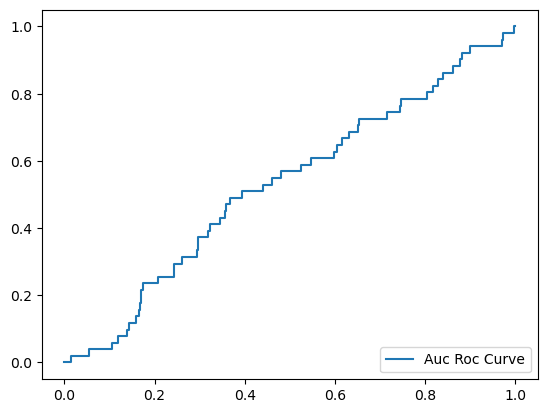

In [154]:
auc_roc_curve(clf1, X_test)

In [12]:
clf = RandomForestClassifier(n_estimators = 500, max_depth = 4, max_features = 3, bootstrap = True, random_state = 18).fit(X_train, Y_train)

In [13]:
# Create our predictions
prediction = clf.predict(X_test)

In [48]:
# Create confusion matrix
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
confusion_matrix(Y_test, prediction)

NameError: name 'Y_test' is not defined

In [15]:
# Display accuracy score
accuracy_score(Y_test, prediction)

0.9640762463343109

In [16]:
# Display F1 score
f1_score(Y_test,prediction)

0.07547169811320754

In [17]:
# Display precision score
precision_score(Y_test,prediction)

1.0

In [18]:
# Display recall score
recall_score(Y_test,prediction)

0.0392156862745098

In [118]:
accuracies_train = []
accuracies_test = []
params_grid = list(range(1, 30))

for param_value in tqdm(params_grid):
    model = RandomForestClassifier(max_depth=param_value, random_state=98)
    model.fit(X_train, Y_train)
    Y_train_pred = model.predict(X_train)
    Y_test_pred = model.predict(X_test)
    accuracies_train.append(np.mean(Y_train_pred == Y_train))
    accuracies_test.append(np.mean(Y_test_pred == Y_test))

  0%|          | 0/29 [00:00<?, ?it/s]

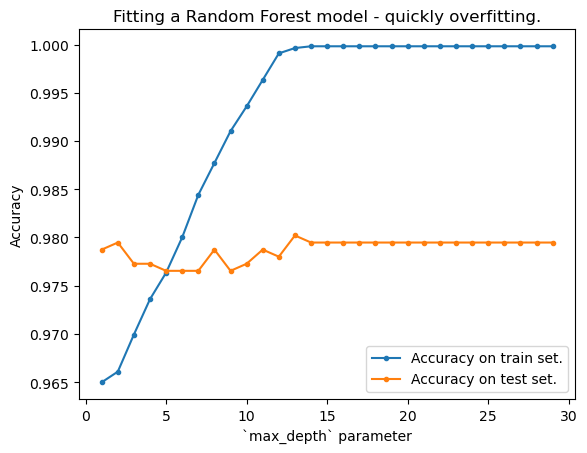

In [119]:
plt.plot(params_grid, accuracies_train, marker=".", label="Accuracy on train set.")
plt.plot(params_grid, accuracies_test, marker=".", label="Accuracy on test set.");
plt.title('Fitting a Random Forest model - quickly overfitting.')
plt.xlabel('`max_depth` parameter')
plt.ylabel('Accuracy')
plt.legend();

In [19]:
from sklearn.feature_selection import SelectFromModel

In [20]:
sel = SelectFromModel(RandomForestClassifier(n_estimators = 35))
sel.fit(X_train, Y_train)

SelectFromModel(estimator=RandomForestClassifier(n_estimators=35))

In [22]:
sel.get_support()

array([ True,  True,  True, False, False, False, False, False,  True,
        True,  True, False, False,  True, False,  True, False,  True,
        True, False, False, False,  True, False, False, False, False,
       False, False,  True,  True, False, False,  True,  True,  True,
        True,  True, False,  True, False, False,  True, False, False,
        True,  True, False,  True,  True, False,  True,  True, False,
       False,  True,  True, False,  True, False, False,  True, False,
       False, False,  True, False, False,  True, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False,  True, False,  True, False, False, False,  True,
       False,  True,  True, False,  True])

In [23]:
selected_feat= X_train.columns[(sel.get_support())]
len(selected_feat)

39

In [24]:
print(selected_feat)

Index([' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Interest-bearing debt interest rate', ' Net Value Per Share (B)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Per Share Net profit before tax (Yuan ¥)', ' Net Value Growth Rate',
       ' Total Asset Return Growth Rate Ratio', ' Quick Ratio',
       ' Interest Expense Ratio', ' Total debt/Total net worth',
       ' Debt ratio %', ' Net worth/Assets', ' Borrowing dependency',
       ' Net profit before tax/Paid-in capital',
       ' Accounts Receivable Turnover', ' Average Collection Days',
       ' Fixed Assets Turnover Frequency', ' Net Worth Turnover Rate (times)',
       ' Operating profit per person', ' Allocation rate per pers

In [25]:
pd.DataFrame(sel.estimator_.feature_importances_.ravel())

,0
0,0.015614
1,0.011385
2,0.016545
3,0.006458
4,0.006737
...,...
90,0.009613
91,0.013624
92,0.019454
93,0.000000


In [28]:
sel.grid_scores_

AttributeError: 'SelectFromModel' object has no attribute 'grid_scores_'

In [103]:
#28/05/23

In [106]:
model = RandomForestClassifier(n_estimators=300)

In [107]:
model.fit(X,Y)

RandomForestClassifier(n_estimators=300)

In [109]:
importances = model.feature_importances_

In [111]:
data_df = pd.DataFrame({'Features':pd.DataFrame(X).columns,"Importances":importances})
data_df.set_index('Importances')

,Features
Importances,
0.012382,ROA(C) before interest and depreciation befor...
0.010950,ROA(A) before interest and % after tax
0.011004,ROA(B) before interest and depreciation after...
0.006890,Operating Gross Margin
0.007133,Realized Sales Gross Margin
...,...
0.011720,Liability to Equity
0.018263,Degree of Financial Leverage (DFL)
0.014956,Interest Coverage Ratio (Interest expense to ...
